# Automated Ideation with ChatGPT and Stable Diffusion

Copyright 2023-2024, Denis Rothman

This notebook implements an educational example of automated ideation beyon human designed prompts.

The automation requires no human intervention. It's a click-and-run process.

The notebook automatically creates an instruction for ChatGPT which in turn creates prompts that Stable Diffusion transformers into images.

#OpenAI API May 1,2024 Release & Environment

**Note:** The latest **OpenAI May 1,2024 release** and the latest **April 26,2024 Transformers release**  required checking all the dependencies of the packages installed in this notebook to check for potential conflicts and freeze the versions.

As such, an **environment** section was created. You can hide it after reading it by clicking on the left top side of this cell.

#Automated Ideation Process

1.**The context document** is prepared
2.**ChatGPT**, GPT-4, generates text-to-image prompts     
3.**Stable Diffusion** generates images from automated prompts.


In [1]:
!curl -L https://raw.githubusercontent.com/Denis2054/Transformers-for-NLP-and-Computer-Vision-3rd-Edition/main/Notebook%20images/20/chatgpt_stable_diffusion.jpg --output "chatgpt_stable_diffusion.jpg"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 67008  100 67008    0     0  91909      0 --:--:-- --:--:-- --:--:-- 91917


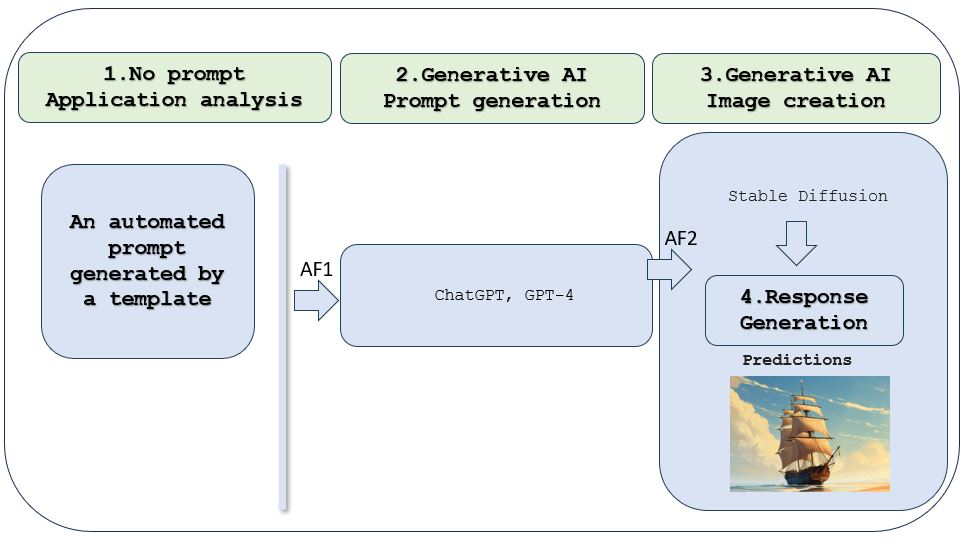

In [2]:
# @title
from IPython.display import Image     #This is used for rendering images in the notebook
from PIL import Image
image_path = "/content/chatgpt_stable_diffusion.jpg"
image = Image.open(image_path)
image

#Environment May 1,2024

**Note:** The latest **OpenAI May 1,2024 release** and the latest **April 26,2024 Transformers release**  required checking all the dependencies of the packages installed in this notebook to check for potential conflicts and freeze the versions.

As such this **Environment** section was created. You can hide it after reading it by clicking on the left top side of this cell.

In [3]:
#To access saved API keys
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive





**Installing OpeanAI and Costs:**    
This notebook uses billable components of [OpenAI](https://openai.com/) for ChatGPT, GPT-4.

**openai 1.25.0 released May 1, 2024** dependencies:

- **anyio (3.7.1)**: Provides asynchronous networking and concurrency support, required by openai.
- **distro (1.7.0)**: Helps identify the properties of a Linux distribution, used by openai.
- **httpx (0.27.0)**: A powerful HTTP client for async or synchronous requests, required by openai.
- **pydantic (2.7.1)**: Data validation and settings management using Python type annotations.
- **sniffio (1.3.1)**: Detects the type of async library in use, ensuring compatibility.
- **tqdm (4.66.2)**: Fast, extensible progress bar for loops and code tracking.
- **typing-extensions (4.11.0)**: Provides backported and experimental type hints for older versions of Python.
- **idna (3.7)**: Supports the Internationalized Domain Names in Applications (IDNA) standard.
- **exceptiongroup (1.2.1)**: Manages groups of exceptions for better error handling.
- **certifi (2024.2.2)**: Provides Mozilla's CA Bundle for validating SSL certificates.
- **httpcore (1.0.5)**: Core components of HTTP client functionality, dependency of httpx.
- **h11 (0.14.0)**: A pure-Python, bring-your-own-I/O implementation of HTTP/1.1.

In [4]:
#Importing openai
try:
  import openai
  from openai import OpenAI
except:
  !pip install openai==1.25.0
  import openai
  from openai import OpenAI

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 312.9/312.9 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 9.8 MB/s eta 0:00:00


**List of packages and each dependency for the `diffusers` library along with their versions:**

- **diffusers (0.27.2)**: A library for running diffusion models, often used for text-to-image generation.
- **importlib-metadata (7.1.0)**: Provides metadata for Python packages, helping with introspection of installed packages.
- **filelock (3.13.4)**: Provides a simple cross-platform mechanism to lock files, useful for handling concurrency.
- **huggingface-hub (0.20.3)**: Facilitates downloading and managing models and files from the Hugging Face Hub.
- **numpy (1.25.2)**: Fundamental package for scientific computing with Python, used for array manipulation.
- **regex (2023.12.25)**: Enhanced regular expressions module, supporting variations not available in the built-in `re` module.
- **requests (2.31.0)**: Essential HTTP library for Python, used for making API calls.
- **safetensors (0.4.3)**: Provides a safe format for tensor serialization, supporting interoperability across different frameworks.
- **Pillow (9.4.0)**: The Python Imaging Library adds image processing capabilities to your Python interpreter.
- **fsspec (2023.6.0)**: A specification for Python filesystems to handle various types of file systems.
- **tqdm (4.66.2)**: Extensible progress bar for Python and CLI, used for visualizing progress.
- **pyyaml (6.0.1)**: YAML parser and emitter for Python, used for managing configuration files.
- **typing-extensions (4.11.0)**: Backports of newer features from the typing module, enhancing type hint capabilities.
- **packaging (24.0)**: Core utilities for Python packages, including version handling and specifiers.
- **zipp (3.18.1)**: Provides a backward-compatible API for zipfile-like libraries.
- **charset-normalizer (3.3.2)**, **idna (3.7)**, **urllib3 (2.0.7)**, **certifi (2024.2.2)**: These ensure proper handling of character encodings, domain names, URL manipulations, and SSL certificates for HTTP requests.

In [5]:
!pip install diffusers==0.27.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 22.1 MB/s eta 0:00:00


**list of packages and each dependency for the `accelerate` library along with their versions:**

- **accelerate (0.29.3)**: Facilitates faster and scalable training of machine learning models using PyTorch.
- **numpy (1.25.2)**: Fundamental package for numerical computation in Python.
- **packaging (24.0)**: Provides support for version and specification handling of Python packages.
- **psutil (5.9.5)**: Cross-platform library for retrieving information on running processes and system utilization.
- **pyyaml (6.0.1)**: YAML parser and emitter for Python.
- **torch (2.2.1+cu121)**: PyTorch, a deep learning library providing tensor computation and automatic differentiation.
- **huggingface-hub (0.20.3)**: Interface to Hugging Face's model repository, enabling model management.
- **safetensors (0.4.3)**: Ensures safe serialization of tensors across various frameworks.
- **nvidia-cuda-nvrtc-cu12 (12.1.105)**, **nvidia-cuda-runtime-cu12 (12.1.105)**, **nvidia-cuda-cupti-cu12 (12.1.105)**: Components of NVIDIA CUDA toolkit for runtime and development.
- **nvidia-cudnn-cu12 (8.9.2.26)**: NVIDIA CUDA Deep Neural Network library, a GPU-accelerated library for deep neural networks.
- **nvidia-cublas-cu12 (12.1.3.1)**, **nvidia-cufft-cu12 (11.0.2.54)**, **nvidia-curand-cu12 (10.3.2.106)**, **nvidia-cusolver-cu12 (11.4.5.107)**, **nvidia-cusparse-cu12 (12.1.0.106)**: NVIDIA libraries supporting BLAS, FFT, random number generation, linear algebra, and sparse matrix operations, respectively.
- **nvidia-nccl-cu12 (2.19.3)**: NVIDIA Collective Communications Library, supports multi-GPU and multi-node communication.
- **nvidia-nvtx-cu12 (12.1.105)**: NVIDIA Tools Extension library, providing support for profiling and tracing capabilities.
- **nvidia-nvjitlink-cu12 (12.4.127)**: Provides JIT compilation features for CUDA.
- **filelock (3.13.4)**: Utility for file locking, ensuring no concurrent access issues during file operations.
- **typing-extensions (4.11.0)**: Backports and additional features to the typing module.
- **sympy (1.12)**, **networkx (3.3)**, **jinja2 (3.1.3)**, **fsspec (2023.6.0)**: Libraries for symbolic mathematics, graph theory, template rendering, and filesystem abstraction, used within PyTorch and other dependencies.
- **requests (2.31.0)**: HTTP library for making requests, used by `huggingface-hub` and other dependencies.

In [6]:
!pip install accelerate==0.29.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.6/297.6 kB 7.2 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

**List of packages and each dependency for the `transformers` library along with their versions:**

- **transformers (4.40.1)**: A popular library for using state-of-the-art natural language processing models.
- **filelock (3.13.4)**: Provides a file locking mechanism to manage file access.
- **huggingface-hub (0.20.3)**: A client library for downloading and managing models on the Hugging Face Model Hub.
- **numpy (1.25.2)**: Essential library for scientific computing, especially for array and matrix operations.
- **packaging (24.0)**: Helps manage versions and packages in Python, crucial for ensuring correct dependency versions.
- **pyyaml (6.0.1)**: Parses and generates YAML files, used for configuration handling.
- **regex (2023.12.25)**: Enhanced regular expressions library, provides additional functionality over the standard `re` module.
- **requests (2.31.0)**: Essential HTTP library for sending HTTP requests to APIs, used for network communications.
- **tokenizers (0.19.1)**: Efficient library for text tokenization, crucial for processing input data in NLP.
- **safetensors (0.4.3)**: Ensures safe and efficient serialization of tensors, used for model interoperability.
- **tqdm (4.66.2)**: Provides a fast, extensible progress bar for monitoring loops and processes.
- **fsspec (2023.6.0)**: Filesystem specification for abstracting and accessing various types of file systems.
- **typing-extensions (4.11.0)**: Provides additional typing features like `Literal`, `TypedDict`, and others not available in the standard `typing` module.
- **charset-normalizer (3.3.2)**, **idna (3.7)**, **urllib3 (2.0.7)**, **certifi (2024.2.2)**: These are used to handle character encoding, domain names, URL handling, and SSL certificate validation for HTTP requests.

In [7]:
!pip install transformers==4.40.1

**List of packages and dependencies for the `scipy` library along with their versions:**

- **scipy (1.11.4)**: A core library for scientific computing that includes modules for optimization, linear algebra, integration, and more.
- **numpy (1.25.2)**: Essential for numerical computations, it supports a wide range of mathematical operations particularly necessary for scientific computing as used in `scipy`.

In [8]:
!pip install scipy==1.11.4

List of pacakges and dependencies for the `ftfy` library along with their versions:

- **ftfy (6.2.0)**: A Python library that fixes text encoding issues, making it easier to work with text data.
- **wcwidth (0.2.13)**: Measures the printable width of characters on a terminal to ensure text alignment and proper display.

In [9]:
!pip install ftfy==6.2.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 2.5 MB/s eta 0:00:00


## Stable Diffusion Pipeline

`StableDiffusionPipeline` is an end-to-end inference pipeline that you can use to generate images from text with just a few lines of code.


**transformers (v4.22.0):** May 1,2024 note:  A major update has been applied to the Transformers library, necessitating a migration of cached model files. This operation updates the storage format or location of locally cached data used by the library.

Hugging Face note: Please note that authentication is recommended but still optional to access public models or datasets.

In [10]:
import torch
from diffusers import StableDiffusionPipeline

pipe = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4", torch_dtype=torch.float16)

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

safety_checker/config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/313 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

(…)kpoints/scheduler_config-checkpoint.json:   0%|          | 0.00/209 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/551 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Moving the pipeline to GPU to have faster inference.

In [11]:
!nvidia-smi

Thu May  2 04:30:32 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [12]:
pipe = pipe.to("cuda")

Activate  a GPU to run this notebook for Stable Diffusion.

Then check that the GPU is activated with the following instruction.

# 1.Automated context preparation

## Retrieving context documents

The following context document could come from any source: emails, web, knowledge base, PDFs or any other source of information.

Classical administration tools can be used to store the documents.

The following code downloads a text to analyze it and automatically create prompts for Stable Diffusion.

In [13]:
!curl -L https://raw.githubusercontent.com/Denis2054/Transformers-for-NLP-and-Computer-Vision-3rd-Edition/main/Chapter20/ecodocument.txt --output "ecodocument.txt"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2130  100  2130    0     0   8855      0 --:--:-- --:--:-- --:--:--  8875


## Displaying a document for support

It is not necessary to display the document in production.
However, if there is a support request, it can be useful to check the input.

In [14]:
# Read the content of the file
with open("ecodocument.txt", "r") as f:
    content = f.read()

# Display content in HTML format
from IPython.core.display import display, HTML

display(HTML(f"""
<html>
<head>
    <title>Sustainable Fashion</title>
    <style>
        body {{ font-family: Arial, sans-serif; }}
        h1 {{ color: #2E8B57; }}
        p {{ text-align: justify; }}
    </style>
</head>
<body>
    <h1>Why Sustainable Fashion is Our Secret Weapon Against Climate Change</h1>
    <p>{content}</p>
</body>
</html>
"""))


## Automated preparation of instruction for GPT-4

This is a "no prompt" situation in which no human intervention is required in the process.

In [15]:
# Create a variable to store the text and add the content
input_text = "Summarize the following text in 5 lines from 1 to 5 that can be used as text-to-image prompts:" + content
print(input_text) # for support

Summarize the following text in 5 lines from 1 to 5 that can be used as text-to-image prompts:Why Sustainable Fashion is Our Secret Weapon Against Climate Change
Imagine a world where every clothing choice you make becomes a statement, not just of style, but of stewardship for our planet. Sounds empowering, right? That’s because sustainable fashion isn’t just a trend; it’s a revolution. And it’s one of the most potent tools we have to combat climate change.
Fashion’s Carbon Footprint : The global fashion industry accounts for about 10% of carbon emissions, more than all international flights and maritime shipping combined. Each time you select a sustainably produced garment, you’re slashing that carbon footprint.
Water Conservation : The traditional fashion industry consumes a staggering amount of water – it can take up to 2,700 liters of water to make a single cotton t-shirt! Choosing eco-friendly materials and methods can conserve our precious water resources.
Waste Reduction : Every

## Defining the dialog function (static)

In [16]:
 def dialog(uinput):
   #preparing the prompt for OpenAI
   role="user"

   line = {"role": role, "content": uinput}

   #creating the message
   assert1={"role": "system", "content": "You summarize a text in engaging lines that will be used as prompts"}
   assert2={"role": "assistant", "content": "Summarize the best ideas of a text in short lines from 1 to n"}
   assert3=line
   iprompt = []
   iprompt.append(assert1)
   iprompt.append(assert2)
   iprompt.append(assert3)

   #sending the message to ChatGPT
   client = OpenAI()
   response=client.chat.completions.create(model="gpt-4-turbo",messages=iprompt) #ChatGPT dialog
   text=response.choices[0].message.content #property of the response in dot notation

   return text

# 2.Automated Ideation with GPT-4-turbo
.

In [17]:
#The OpenAI Key
f = open("drive/MyDrive/files/api_key.txt", "r")
API_KEY=f.readline()
f.close()

import os
os.environ['OPENAI_API_KEY'] =API_KEY
openai.api_key = os.getenv("OPENAI_API_KEY")

## Ideation

## generate text-to-image prompts

In [18]:
uinput=input_text
text=dialog(uinput) #preparing the messages for ChatGPT and making the request

In [19]:
text

"1. Envision a world where your fashion choices shout stewardship for Earth, propelling a stylish yet sustainable revolution against climate change.\n2. Reduce a massive carbon footprint by choosing fashion that contests the industry's staggering 10% contribution to global emissions, more than all flights and ships combined.\n3. Conserve water dramatically with eco-friendly fashion, transforming the 2,700 liters once needed for a single cotton tee into a symbol of ecological respect.\n4. Embrace sustainable fashion to cut waste, extend garment lifespans, and recycle yesterday’s trends into today’s must-haves, safeguarding our planet.\n5. Support community uplift and ecosystem preservation through ethical fashion choices, ensuring fair wages and safe conditions while protecting biodiversity."

### Prompt output processing

Processing and saving the outputs for the text-to-image generation

In [20]:
# Splitting the string by \n to get a list of sentences
sentences = text.split("\n")

# Splitting the string by \n to get a list of sentences
sentences = [s.strip() for s in text.split("\n") if s]

# Removing the index and extra quotes from each sentence
cleaned_sentences = []
for sentence in sentences:
    parts = sentence.split('.')
    if len(parts) > 1:
        cleaned_sentences.append(parts[1][:-1])

# Writing the cleaned sentences to the file "image2text.txt"
with open("image2text.txt", "w") as file:
    for sentence in cleaned_sentences:
        file.write(sentence + '\n')

Support code to view the content if there is an issue

In [21]:
with open("image2text.txt", "r") as file:
    content = file.read()
    print(content)

 Envision a world where your fashion choices shout stewardship for Earth, propelling a stylish yet sustainable revolution against climate chang
 Reduce a massive carbon footprint by choosing fashion that contests the industry's staggering 10% contribution to global emissions, more than all flights and ships combine
 Conserve water dramatically with eco-friendly fashion, transforming the 2,700 liters once needed for a single cotton tee into a symbol of ecological respec
 Embrace sustainable fashion to cut waste, extend garment lifespans, and recycle yesterday’s trends into today’s must-haves, safeguarding our plane
 Support community uplift and ecosystem preservation through ethical fashion choices, ensuring fair wages and safe conditions while protecting biodiversit



The following code is for Google Drive usage for a project. You can save the prompts for further use without running the Ideation again.

In [22]:
!cp image2text.txt  "drive/MyDrive/files/image2text.txt"

# 3.Image Creation with Stable Diffusion

## Retrieving the ideation outputs

Retrieving Ideation prompts inferred by Google Vertex AI PaLM 2 for text2image prompt creation

The following code is for Google Drive usage for a project

In [23]:
!cp "drive/MyDrive/files/image2text.txt" image2text.txt

## Create a text-to-image function

In [24]:
def text2image(prompt):
  image=pipe(prompt).images[0]
  return image

## Generating images



In [25]:
from IPython.display import Image, display

# Path of the Ideation file containing text prompts
with open("image2text.txt", "r") as f:
    lines = f.readlines()
    line_count = len(lines)
    print("Number of lines", line_count)

Number of lines 5


  0%|          | 0/50 [00:00<?, ?it/s]

Envision a world where your fashion choices shout stewardship for Earth, propelling a stylish yet sustainable revolution against climate chang


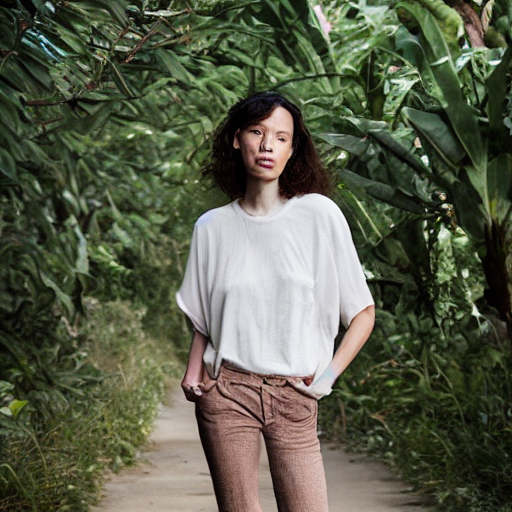

  0%|          | 0/50 [00:00<?, ?it/s]

Reduce a massive carbon footprint by choosing fashion that contests the industry's staggering 10% contribution to global emissions, more than all flights and ships combine


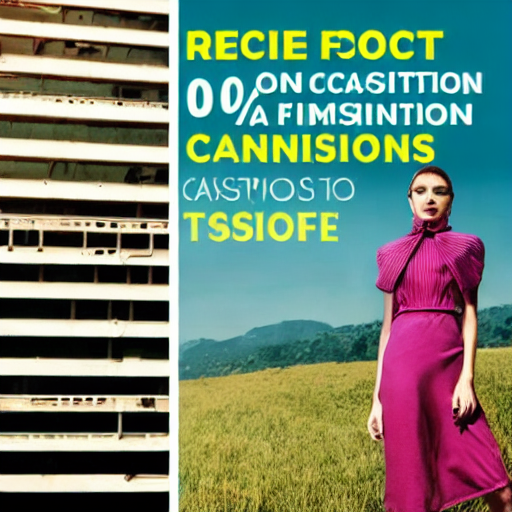

  0%|          | 0/50 [00:00<?, ?it/s]

Conserve water dramatically with eco-friendly fashion, transforming the 2,700 liters once needed for a single cotton tee into a symbol of ecological respec


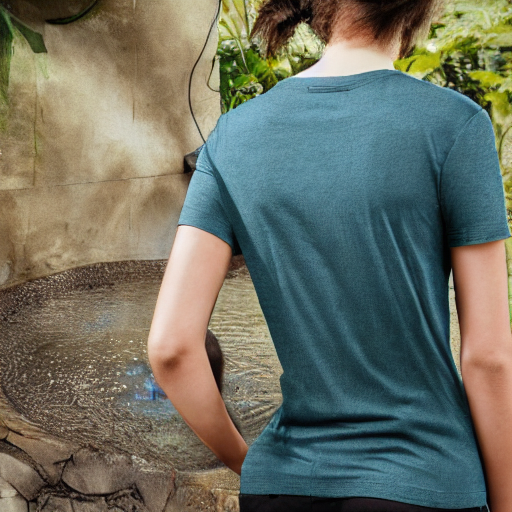

  0%|          | 0/50 [00:00<?, ?it/s]

Embrace sustainable fashion to cut waste, extend garment lifespans, and recycle yesterday’s trends into today’s must-haves, safeguarding our plane


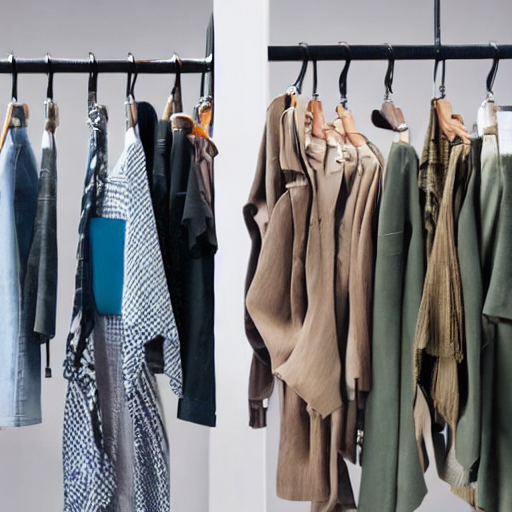

  0%|          | 0/50 [00:00<?, ?it/s]

Support community uplift and ecosystem preservation through ethical fashion choices, ensuring fair wages and safe conditions while protecting biodiversit


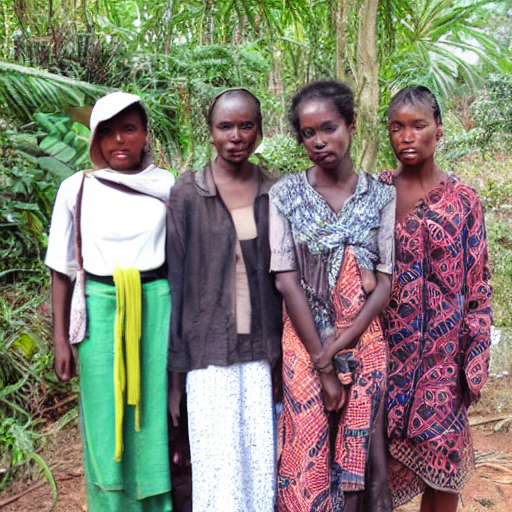

number of images 5


In [26]:
import re
i=0
for line in lines:
    prompt = line.strip()
    prompt = re.sub(r"\d+\. ","", prompt)
    Image = text2image(prompt)
    i+=1
    print(prompt)
    display(Image)

print("number of images", i)